In [1]:
%matplotlib inline
import torch as t
import torchvision
import torchvision.transforms as tfs
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/minst',
    train = True, # 用于训练集
    download = True, # 如果没有这个数据集，允许在线下载
    transform = tfs.Compose([ # 转换
        tfs.ToTensor()
    ])
)

train_loader = t.utils.data.DataLoader(train_set, batch_size = 10) # Load

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
len(train_set)

60000

In [5]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

利用 `bincount` 来统计每个类别的数据有多少。

发现这是平衡的数据集，也就是每个类别的样本数是一致的。

如果每个类别样本数不一致，就说明这个数据集是失衡的。

In [6]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

## dataloader

In [7]:
display_loader = t.utils.data.DataLoader(
    train_set, batch_size = 10
)

In [8]:
batch = next(iter(display_loader))
print(len(batch))
images, labels = batch
print(labels)
print(images.shape)

2
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])
torch.Size([10, 1, 28, 28])


因为 `loader` 指定了 `batch_size = 10`，所以对 `loader` 迭代一次得到的图像张量，在第一个轴(批次数)是 **10**. 

`pytorch` 中，`CNN` 关于图像的张量表示为 `[B, C, H, W]`.

`label` 就是每个图片的类别。 0 - 9 有对应的定义，这个主要看 `FashionMNIST` 相关的内容，不赘述。

接下来都是利用 `pyplot` 来展示图片的操作。

这个打算之后多刷些题目。

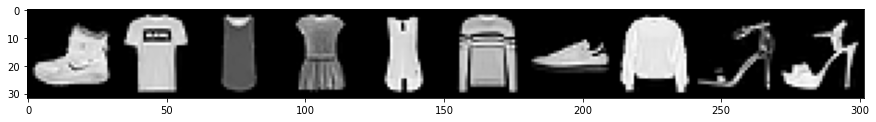

In [19]:
grid = torchvision.utils.make_grid(images, nrow = 10)
# plt.figure()
plt.figure(figsize = (15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

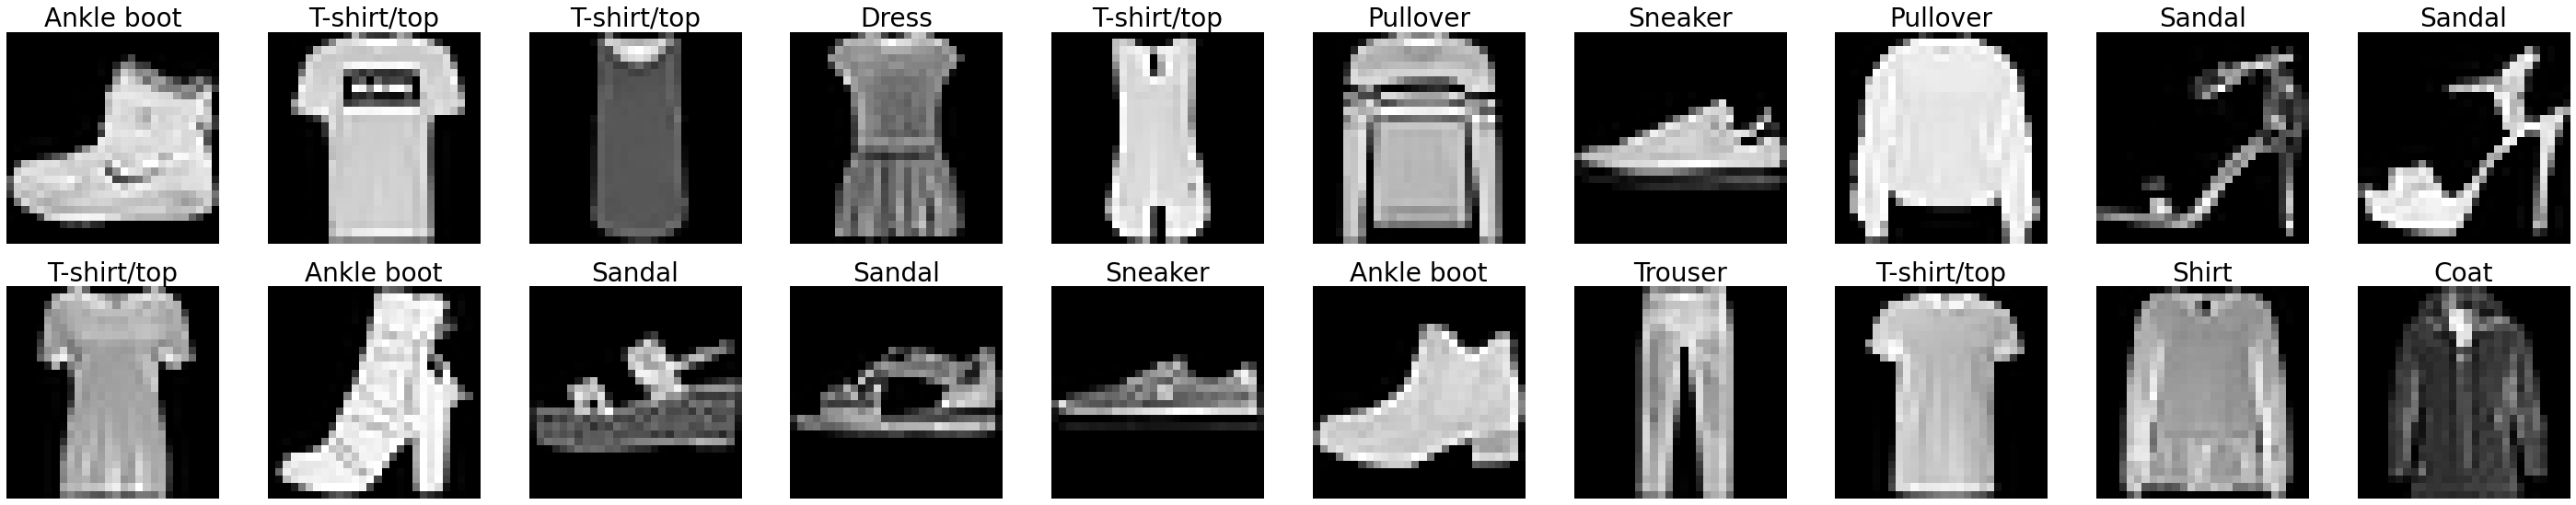

In [23]:
display_loader = t.utils.data.DataLoader(
    train_set
)
how_many_to_plot = 20

plt.figure(figsize = (50, 50))
for i, batch in enumerate(display_loader, start = 1):
    image, label = batch
    plt.subplot(10, 10, i)
    plt.imshow(image.reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()